In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [ ]:
# This notebook generates some "shotgun" datasets -- a dataset with three
# completely artificial classes centered around 10 subcluster centers 
# for each class.  The vector space of the data is just 2d; we can fit a 
# logisitic regression classifier to 

(1000, 2)

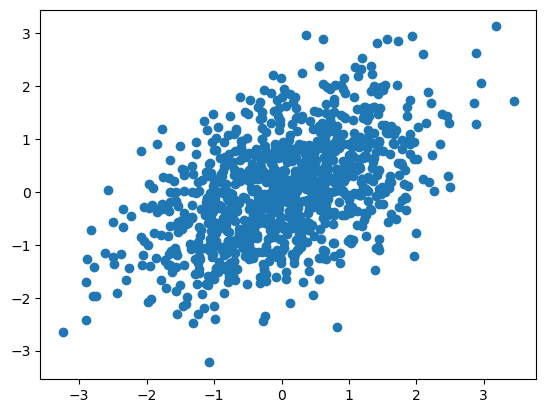

In [3]:
r = 0.5
#You can generate n identical multivariate normals 
# with this funciton, but can't generate n different
# MVNs at once.
a = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=1000)
plt.plot(a[:,0], a[:,1], 'o')
a.shape

In [4]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, r], [r, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, r], [r, 1]]), size=10)
means_3 = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=10)

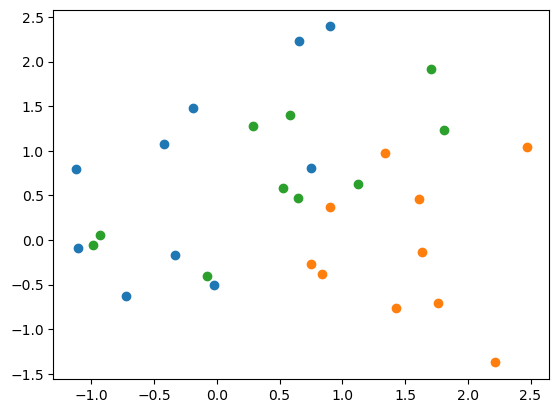

In [8]:
plt.scatter(means_1[:,0], means_1[:,1])
plt.scatter(means_2[:,0], means_2[:,1])
plt.scatter(means_3[:,0], means_3[:,1])


In [10]:
means = [means_1, means_2, means_3]

In [29]:
# generate some data..
Rexp = 0.1
def generate_some_data(means):
    points = []
    for m in means:
        for i in range(len(m)):
            # m[i] is the x1, x2 center of a cluster
            z = scipy.stats.expon.rvs(loc = m[i], scale=Rexp)
            print (z)
            points.append( z)
    return(points)
points = generate_some_data(means)

[0.91665978 2.66166224]
[0.88405412 0.88535709]
[-0.2574412   1.29312141]
[-1.09371379 -0.05570313]
[-0.10485971  1.67645354]
[-0.00828522 -0.47615686]
[-0.40203009 -0.4082943 ]
[-1.08159021  0.89965672]
[1.25900274 2.40125275]
[-0.23059895 -0.15573428]
[ 0.94449847 -0.27590091]
[ 0.994811   -0.07334668]
[ 2.23523305 -1.12487259]
[1.06583438 0.40207102]
[1.64939326 0.74106881]
[ 1.80395138 -0.61429033]
[1.4524139  1.04336995]
[ 1.67015753 -0.05143133]
[2.47519528 1.19261116]
[ 1.64630548 -0.68522536]
[-0.85201858 -0.0365969 ]
[-0.92375235  0.13969763]
[1.2578109  0.67652768]
[0.62929125 1.73025432]
[ 0.1790788  -0.27466005]
[0.66088654 0.61190859]
[1.81232709 1.3535669 ]
[1.71548971 2.55438365]
[0.63080545 0.61628105]
[0.55355643 1.43274094]


In [33]:
points = np.array(points)  # cleanup from list-of-arrays to 2d array

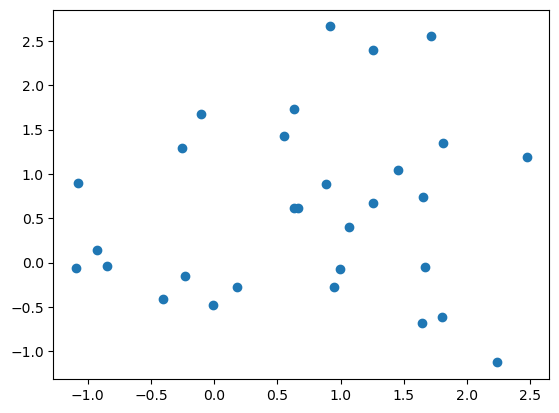

In [35]:
plt.plot(points[:,0], points[:,1], 'o')

In [53]:
# Keep track of cluster IDs... do it more times...
Rexp = 0.1
def generate_some_data(means, n = 100 ):
    points = []
    labels = []
    for j in range(n):
        for m in range(len(means)):
            for i in range(len(means[m])):
                # means[m][i] is the x1, x2 center of a cluster
                z = scipy.stats.expon.rvs(loc = means[m][i], scale=Rexp)
                points.append( z)
                labels.append(m)
    return(np.array(points), labels)
points, labels = generate_some_data(means)

In [65]:
colormap = {0: "r", 1: "b", 2: "g"} 
c = [colormap[i] for i in labels]
len(points), len(c), points.shape

(3000, 3000, (3000, 2))

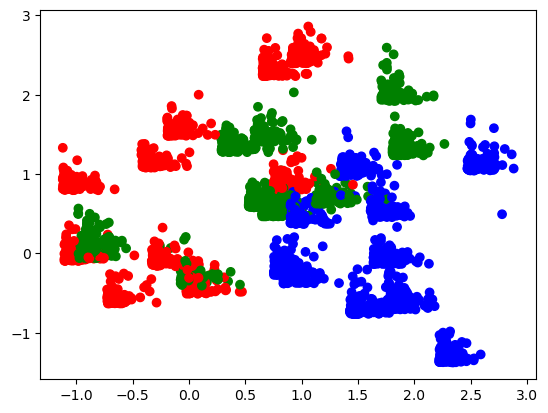

In [72]:
plt.scatter(points[:,0], points[:,1], c=c )

In [74]:
# This is not quite right; my "exponential" functions are always positive.
# 

In [75]:
# Change this random within-cluster function to laplace distribution 
Rexp = 0.1
def generate_some_data(means, n = 100 ):
    points = []
    labels = []
    for j in range(n):
        for m in range(len(means)):
            for i in range(len(means[m])):
                # means[m][i] is the x1, x2 center of a cluster
                z = scipy.stats.laplace.rvs(loc = means[m][i], scale=Rexp)
                points.append( z)
                labels.append(m)
    return(np.array(points), labels)
points, labels = generate_some_data(means)

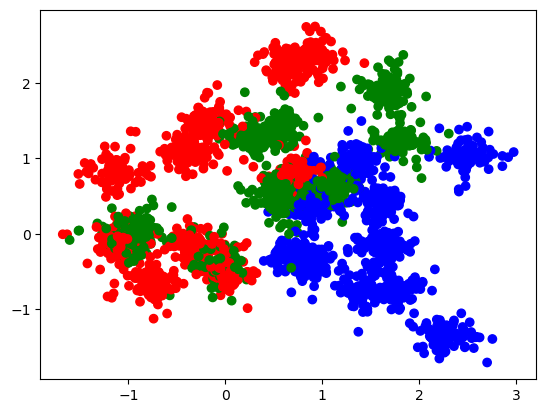

In [76]:
colormap = {0: "r", 1: "b", 2: "g"} 
c = [colormap[i] for i in labels]
len(points), len(c), points.shape
plt.scatter(points[:,0], points[:,1], c=c)

In [ ]:
# I know the density precisely; I just have to sum over 30 two-dimensional Laplace densities:



In [81]:
def shotgun_density(x, means):
    density = []
    for m in range(len(means)):  # there are m clusters 
            p=0
            for i in range(len(means[m])):   # there are len(means[m]) subclusters
                # means[m][i] is the x1, x2 center of a cluster
                p = p+ scipy.stats.laplace.pdf(x, loc = means[m][i], scale=Rexp)
            density.append(p)
            print("x", x, "p", p)
    return(np.array(density))
shotgun_density([0,0],means)

x [0, 0] p [4.92835591 2.95981508]
x [0, 0] p [0.00445089 1.91190036]
x [0, 0] p [2.70799219 5.86135418]


array([[4.92835591e+00, 2.95981508e+00],
       [4.45089136e-03, 1.91190036e+00],
       [2.70799219e+00, 5.86135418e+00]])

In [ ]:
# This is funny... you give scipy.stats.laplace.pdf ( x = [0,0] and means = [0,0] ) 
# and it returns TWO numbers... oh, dear.  scipy.stats.laplace is a 1d function.

# This was fine for generating shotgun-like clusters, but is not fine for calculating 
# the density.  Does this mean I have to do calculus?  Meh, everything has the same
# normalization constant if Rexp is the same for all 30 distributions.. 

In [87]:
def shotgun_density(x, means=means):
    density = []
    for m in range(len(means)):  # there are m clusters 
            p=0
            for i in range(len(means[m])):   # there are len(means[m]) subclusters
                # means[m][i] is the x1, x2 center of a cluster
                p = p+ np.exp ( - np.sum( ( x-means[m][i]) **2 / 2 / Rexp**2)  )
            density.append(p)
    return(np.array(density))
shotgun_density([0,0],means)

array([1.14630581e-03, 1.07358225e-14, 1.95208438e-04])

20

In [91]:
def grideval(func):
    xgrid = np.linspace(-10,10,110) # range for flipper length
    ygrid = np.linspace(-10,10,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1)


In [92]:
z = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


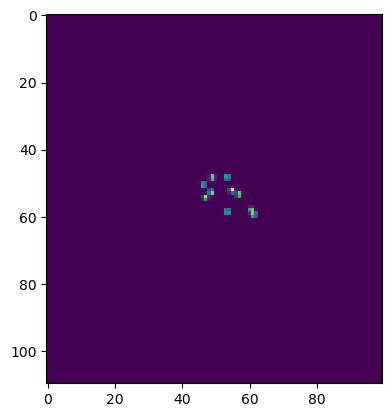

In [93]:
plt.imshow(z)

In [228]:
# OK, cool, I can work with that.  My range (-10, 10) x (-10, 10) was too big.


array([[19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 18.],
       ...,
       [14., 14., 14., ..., 11., 11., 11.],
       [14., 14., 14., ..., 11., 11., 11.],
       [14., 14., 14., ..., 11., 11., 11.]])

In [94]:
def grideval(func):
    xgrid = np.linspace(-3,3,110) # range for flipper length
    ygrid = np.linspace(-3,3,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1)
z = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


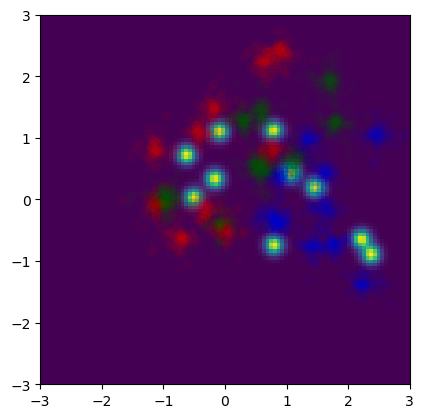

In [114]:
xgrid = np.linspace(-3,3,110) # range for x1
ygrid = np.linspace(-3,3,100)  # range for x2

plt.imshow( z, extent = (ygrid[0], ygrid[-1], xgrid[0], xgrid[-1]) )
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [ ]:
# This requires some fiddling to get right; z.T  and origin="lower" by 
# trial and error will do the right thing.

In [117]:
xax, yax = np.meshgrid(ygrid, xgrid)

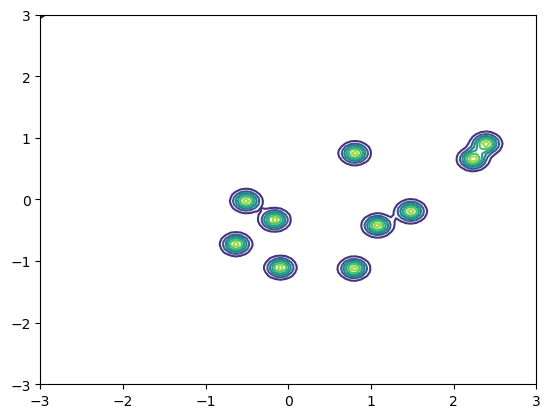

In [121]:
#CS = plt.contourf(xax, yax, z) 
CS = plt.contour(xax, yax, z, levels=6 ) 

#plt.colorbar(cmap="seismic")
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

In [122]:
def grideval(func):
    xgrid = np.linspace(-3,3,110) # range for flipper length
    ygrid = np.linspace(-3,3,100)  # range for beak length
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x)[0]
            z2[i,j]= func(x)[1]
            z3[i,j]= func(x)[2]
    return(z1,z2,z3)
z1,z2,z3 = grideval(shotgun_density)

(110, 100) (110, 100) (110, 100)


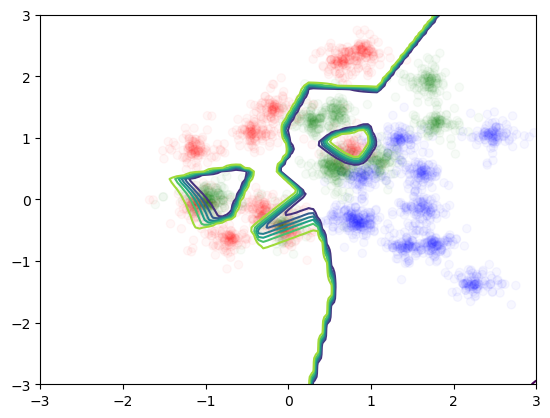

In [135]:
CS = plt.contour(yax, xax, z1/(z1+z2+z3), levels=6, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [136]:
X = points
Y = labels

In [137]:
from sklearn.linear_model import LogisticRegression

In [141]:
clf = LogisticRegression().fit(X,Y)

In [145]:
clf.predict(X[2].reshape(1, -1)
           )

array([0])

In [153]:
[clf.predict(X[i].reshape(1,-1)) for i in range(len(X)) ][0:10]

[array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([2])]

In [ ]:
# Hmm.. while this IS the right kind of data, the values don't look right..
# Wasn't it a waltz, 0,1,2,0,1,2,0,1,2 ? 

In [150]:
def grideval_simple(func):
    xgrid = np.linspace(-3,3,110) 
    ygrid = np.linspace(-3,3,100) 
    xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
    z1 = np.zeros(xax.shape); z2 = np.zeros(xax.shape); z3 = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z1.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z1[i,j]= func(x.reshape(1, -1))  # contains a single sample
    return(z1)
zclass = grideval_simple(clf.predict)

(110, 100) (110, 100) (110, 100)


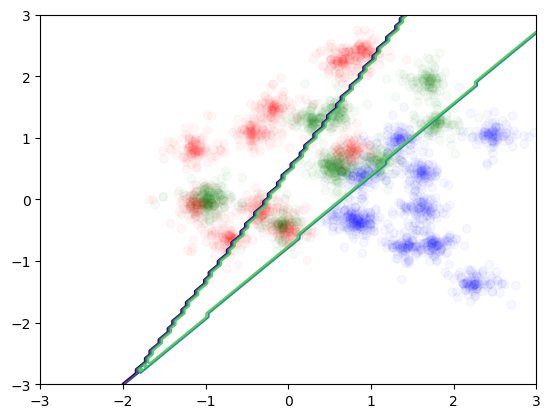

In [152]:
CONTOURCLASS = plt.contour(yax, xax, zclass, levels=3, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )

In [155]:
# Ouch.  Logistic regression is not working for us here! 
# Maybe a model that can have decision boundaries that are not
# limited to two straight lines?  ? 
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfm = RandomForestClassifier().fit(X,Y)

In [157]:
zclass2 = grideval_simple(rfm.predict)

(110, 100) (110, 100) (110, 100)


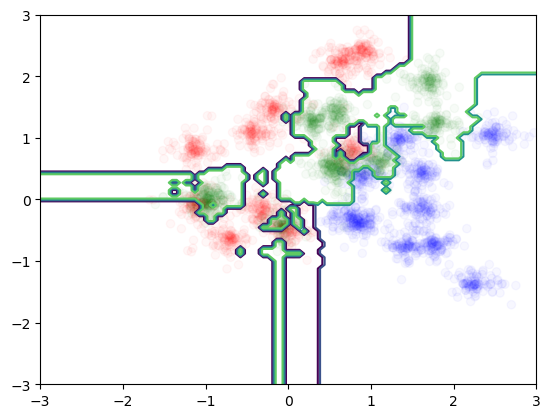

In [158]:
CONTOURCLASS = plt.contour(yax, xax, zclass2, levels=3, origin="lower" ) 
plt.scatter(points[:,0], points[:,1], c=c, alpha=0.03 )